In [93]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pk
import seaborn as sns

In [94]:
models = []
acc = []
precision = []
recall = []
f1 = []
AUC_Score=[]

In [95]:
dataset = pd.read_csv('heart.csv', index_col=0)
dataset.tail()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,,,,,,,,,,,,,
57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [96]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state = 0)

In [98]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [99]:
X_train = sc.fit_transform(X_train)

In [100]:
X_test = sc.transform(X_test)

## Decision Trees

In [101]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', 
                            max_depth=3 ,
                            random_state = 0)
dt.fit(X_train, y_train)
models.append('Decision Trees')

# Support Vector Machines

In [102]:
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf', random_state = 0,probability=True )
svc.fit(X_train, y_train)
models.append('SVM')

# Random Forest Classifier

In [103]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 12, criterion = 'entropy', 
                                    random_state = 0)
rf.fit(X_train, y_train)
models.append('Random Forest')

# Naive Bayes Model

In [104]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, y_train)
models.append('NaiveBayesModel')

In [105]:
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, 
                             recall_score, f1_score, roc_curve, roc_auc_score)

In [106]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

# Matrices for Decision Tree

In [107]:
print('Confusion Matrix for DTrees: \n',confusion_matrix(y_test, dt.predict(X_test)))
print('Accuracy for DTrees: \n',accuracy_score(y_test, dt.predict(X_test)))
acc.append(accuracy_score(y_test, dt.predict(X_test)))
print('Precision for DTrees: \n',precision_score(y_test, dt.predict(X_test)))
precision.append(precision_score(y_test, dt.predict(X_test)))
print('Recall for DTrees: \n',recall_score(y_test, dt.predict(X_test)))
recall.append(recall_score(y_test, dt.predict(X_test)))
print('f1_score for DTrees: \n',f1_score(y_test, dt.predict(X_test)))
f1.append(f1_score(y_test, dt.predict(X_test)))
print('AUC_Score for DTrees: \n',roc_auc_score(y_test, dt.predict(X_test)))
AUC_Score.append(roc_auc_score(y_test, dt.predict(X_test)))

Confusion Matrix for DTrees: 
 [[24  9]
 [ 9 34]]
Accuracy for DTrees: 
 0.7631578947368421
Precision for DTrees: 
 0.7906976744186046
Recall for DTrees: 
 0.7906976744186046
f1_score for DTrees: 
 0.7906976744186046
AUC_Score for DTrees: 
 0.758985200845666


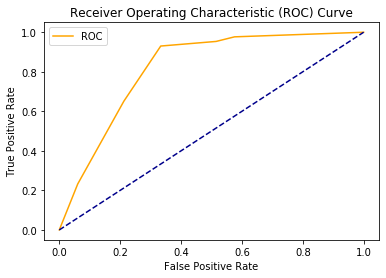

In [108]:
probs = dt.predict_proba(X_test)
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

# # Matrices for Support Vector Machine

In [109]:
print('Confusion Matrix for SVM: \n',confusion_matrix(y_test, svc.predict(X_test)))
print('Accuracy for SVM: \n',accuracy_score(y_test, svc.predict(X_test)))
acc.append(accuracy_score(y_test, svc.predict(X_test)))
print('Precision for SVM: \n',precision_score(y_test, svc.predict(X_test)))
precision.append(precision_score(y_test, svc.predict(X_test)))
print('Recall for SVM: \n',recall_score(y_test, svc.predict(X_test)))
recall.append(recall_score(y_test, svc.predict(X_test)))
print('f1_score for SVM: \n',f1_score(y_test, svc.predict(X_test)))
f1.append(f1_score(y_test, svc.predict(X_test)))
print('AUC_Score for SVM: \n',roc_auc_score(y_test, svc.predict(X_test)))
AUC_Score.append(roc_auc_score(y_test, svc.predict(X_test)))

Confusion Matrix for SVM: 
 [[24  9]
 [ 3 40]]
Accuracy for SVM: 
 0.8421052631578947
Precision for SVM: 
 0.8163265306122449
Recall for SVM: 
 0.9302325581395349
f1_score for SVM: 
 0.8695652173913043
AUC_Score for SVM: 
 0.828752642706131


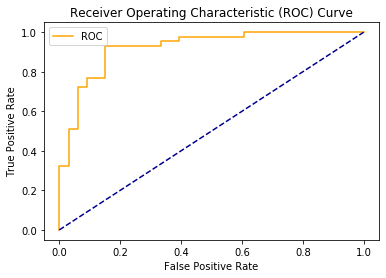

In [110]:
probs = svc.predict_proba(X_test)
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

# # Matrices for Random Forest

In [111]:
print('Confusion Matrix for RF: \n',confusion_matrix(y_test, rf.predict(X_test)))
print('Accuracy for RF: \n',accuracy_score(y_test, rf.predict(X_test)))
acc.append(accuracy_score(y_test, rf.predict(X_test)))
print('Precision for RF: \n',precision_score(y_test, rf.predict(X_test)))
precision.append(precision_score(y_test, rf.predict(X_test)))
print('Recall for RF: \n',recall_score(y_test, rf.predict(X_test)))
recall.append(recall_score(y_test, rf.predict(X_test)))
print('f1_score for RF: \n',f1_score(y_test, rf.predict(X_test)))
f1.append(f1_score(y_test, rf.predict(X_test)))
print('AUC_Score for RF: \n',roc_auc_score(y_test, rf.predict(X_test)))
AUC_Score.append(roc_auc_score(y_test, rf.predict(X_test)))

Confusion Matrix for RF: 
 [[25  8]
 [ 5 38]]
Accuracy for RF: 
 0.8289473684210527
Precision for RF: 
 0.8260869565217391
Recall for RF: 
 0.8837209302325582
f1_score for RF: 
 0.853932584269663
AUC_Score for RF: 
 0.8206483439041579


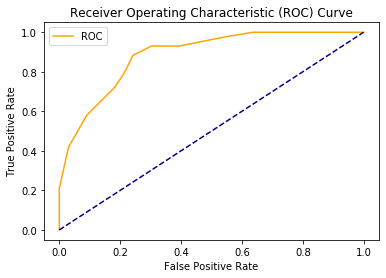

In [112]:
probs = rf.predict_proba(X_test)
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

# # Matrices for Naive Bayes

In [113]:
print('Confusion Matrix for GNB: \n',confusion_matrix(y_test, GNB.predict(X_test)))
print('Accuracy for GNB: \n',accuracy_score(y_test, GNB.predict(X_test)))
acc.append(accuracy_score(y_test, GNB.predict(X_test)))
print('Precision for GNB: \n',precision_score(y_test, GNB.predict(X_test)))
precision.append(precision_score(y_test, GNB.predict(X_test)))
print('Recall for GNB: \n',recall_score(y_test, GNB.predict(X_test)))
recall.append(recall_score(y_test, GNB.predict(X_test)))
print('f1_score for GNB: \n',f1_score(y_test, GNB.predict(X_test)))
f1.append(f1_score(y_test, GNB.predict(X_test)))
print('AUC_Score for GNB: \n',roc_auc_score(y_test, GNB.predict(X_test)))
AUC_Score.append(roc_auc_score(y_test, GNB.predict(X_test)))

Confusion Matrix for GNB: 
 [[23 10]
 [ 4 39]]
Accuracy for GNB: 
 0.8157894736842105
Precision for GNB: 
 0.7959183673469388
Recall for GNB: 
 0.9069767441860465
f1_score for GNB: 
 0.8478260869565216
AUC_Score for GNB: 
 0.8019732205778717


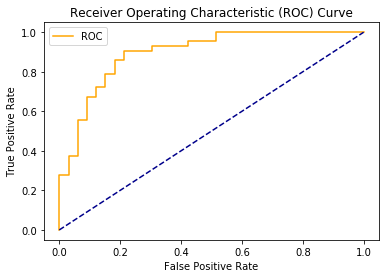

In [114]:
probs = GNB.predict_proba(X_test)
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

In [115]:
model_dict = {'Models': models,
             'Accuracies': acc,
             'Precision': precision,
             'Recall': recall,
             'f1-score': f1,
             'AUC_Score':AUC_Score}

In [116]:
model_df = pd.DataFrame(model_dict)
model_df

,Models,Accuracies,Precision,Recall,f1-score,AUC_Score
0,Decision Trees,0.763158,0.790698,0.790698,0.790698,0.758985
1,SVM,0.842105,0.816327,0.930233,0.869565,0.828753
2,Random Forest,0.828947,0.826087,0.883721,0.853933,0.820648
3,NaiveBayesModel,0.815789,0.795918,0.906977,0.847826,0.801973


In [117]:
model_df = model_df.sort_values(['Accuracies', 'f1-score', 'Recall', 'Precision'],
                               ascending=False)

In [118]:
model_df

,Models,Accuracies,Precision,Recall,f1-score,AUC_Score
1,SVM,0.842105,0.816327,0.930233,0.869565,0.828753
2,Random Forest,0.828947,0.826087,0.883721,0.853933,0.820648
3,NaiveBayesModel,0.815789,0.795918,0.906977,0.847826,0.801973
0,Decision Trees,0.763158,0.790698,0.790698,0.790698,0.758985


# Hyper parameter tuning

In [119]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = dt, 
                             X = X_train, 
                             y = y_train, 
                             cv = 20)
acMean = accuracies.mean()
acStd = accuracies.std()

In [120]:
acMean
acStd

0.12211077856023889

In [121]:
accuracies

array([0.66666667, 0.75      , 0.66666667, 0.91666667, 0.83333333,
       0.66666667, 1.        , 1.        , 0.90909091, 0.81818182,
       0.72727273, 0.90909091, 0.63636364, 0.81818182, 0.90909091,
       0.63636364, 0.72727273, 0.90909091, 1.        , 0.81818182])

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_estimators": [100, 200, 300],
              "criterion":['gini','entropy'],
              "max_depth": [8, 16, 32],
              "min_samples_split": [10, 20, 30],
              "min_samples_leaf": [1, 5, 15],
              "min_weight_fraction_leaf": [0.1, 0.05, 0.005]}
grid_search = GridSearchCV(estimator = rf,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 20,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [ ]:
best_accuracy = grid_search.best_score_

In [ ]:
best_accuracy

In [ ]:
best_parameters = grid_search.best_params_

In [ ]:
best_parameters

In [ ]:
from sklearn.ensemble import RandomForestClassifier
tunedRF = RandomForestClassifier(n_estimators = best_parameters["n_estimators"],
                                 criterion = best_parameters["criterion"],
                                 max_depth = best_parameters["max_depth"],
                                 min_samples_split = best_parameters["min_samples_split"],
                                 min_samples_leaf = best_parameters["min_samples_leaf"],
                                 min_weight_fraction_leaf = best_parameters["min_weight_fraction_leaf"])
tunedRF.fit(X_train, y_train)

In [ ]:
print('Confusion Matrix for Tuned RF: \n',confusion_matrix(y_test, tunedRF.predict(X_test)))
print('Accuracy for Tuned RF: \n',accuracy_score(y_test, tunedRF.predict(X_test)))
acc.append(accuracy_score(y_test, tunedRF.predict(X_test)))
print('Precision for Tuned RF: \n',precision_score(y_test, tunedRF.predict(X_test)))
precision.append(precision_score(y_test, tunedRF.predict(X_test)))
print('Recall for Tuned RF: \n',recall_score(y_test, tunedRF.predict(X_test)))
recall.append(recall_score(y_test, tunedRF.predict(X_test)))
print('f1_score for Tuned RF: \n',f1_score(y_test, tunedRF.predict(X_test)))
f1.append(f1_score(y_test, tunedRF.predict(X_test)))

In [ ]:
model_dict = {'Models': models,
             'Accuracies': acc,
             'Precision': precision,
             'Recall': recall,
             'f1-score': f1,
             'AUC_Score':AUC_Score}

In [ ]:
model_df = pd.DataFrame(model_dict)
model_df

In [ ]:
model_df = model_df.sort_values(['Accuracies', 'f1-score', 'Recall', 'Precision'],
                               ascending=False)
model_df